In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifft2
import cv2

In [24]:
image_path = r'C:/Users/furkan/Desktop/image101.png'
image = np.array(Image.open(image_path).convert('L'))


In [25]:
def plot_images(images, titles, cmap='gray'):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img, cmap=cmap)
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

In [26]:
def compute_fourier_spectrum(image):
    F = fft2(image)
    F_shifted = fftshift(F)
    magnitude_spectrum = np.log(1 + np.abs(F_shifted))
    return F, F_shifted, magnitude_spectrum

In [27]:
def low_pass_filter(F_shifted, radius):
    rows, cols = F_shifted.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), dtype=np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 1, thickness=-2)
    return F_shifted * mask

In [28]:
def inverse_fourier(F_shifted):
    F_ishifted = np.fft.ifftshift(F_shifted)
    img_back = np.fft.ifft2(F_ishifted)
    img_back = np.abs(img_back)
    return img_back


In [31]:
F, F_shifted, magnitude_spectrum = compute_fourier_spectrum(image)
F_shifted_filtered = low_pass_filter(F_shifted, radius=30)
filtered_image = inverse_fourier(F_shifted_filtered)

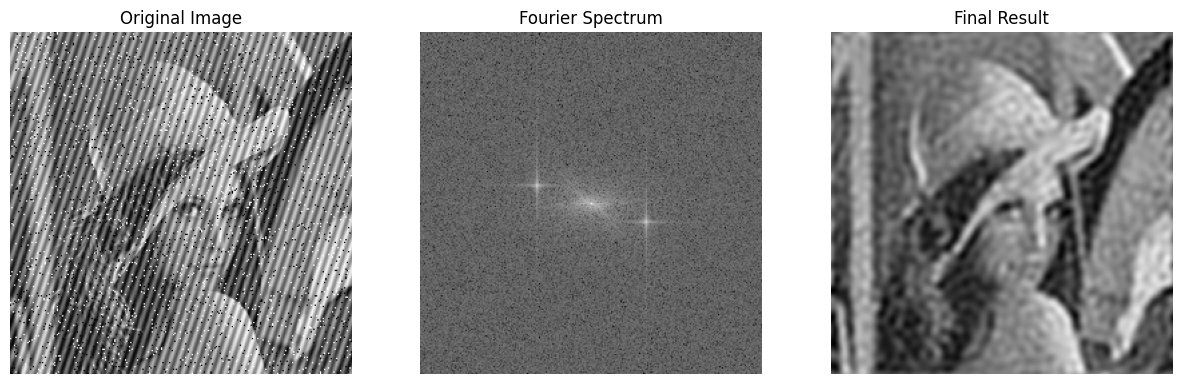

In [32]:
plot_images([image, magnitude_spectrum, filtered_image],
            ['Original Image', 'Fourier Spectrum', 'Final Result'])